Cardiovascular  Risk

Summary

In this project worked on a project using data about people's age ,habits abd health (like BMI , BP...) to predict their chance of getting heart disease in the next 10 years using Machine Learning.

Data Gathering :
Collect the data from kaggle . dataset contains 3390 rows and 17 columns.

EDA:
The study reveals a mere 15% positivity rate for CHD among patients, indicating an imbalance in the dependent variable.

Female patients are more than male patients in the study.
Nearly half of the patients are smokers.

22 patients in the study have experienced a stroke.

1069 patients have histroy of Hypertension.


About 100 patients in the study are taking blood pressure medication.

Diabetes is present in 87 patients.

Older patients face a higher risk of CHD compared to younger ones.

Male patients exhibit a significantly higher risk  of CHD compared to females .

Patients taking blood pressure medication have a significantly higher risk (33%) of CHD compared to others (14%).

Patients with a history of stroke have a significantly higher risk (45%) of CHD compared to others (14%).

Hypertensive patients have a significantly higher risk (23%) of CHD compared to others (11%).

Diabetic patients have a significantly higher risk (37%) of CHD compared to others (14%).

Systolic and diastolic blood pressure are highly correlated.

Feature Engineering and Preprocessing :
Feature selection was performed using variance inflation factor to remove multicollinearity and .
Handling the missing value categorical column replace ny mode and numrical column replace by mean.
Detect the outliers using box plot and remove them

Handling Imbalanced Dataset:
The distribution of the target variable, TenYearCHD, was found to be imbalanced, with only 15% of individuals classified as having a high risk of developing CHD. To address this issue, we employed the Synthetic Minority Oversampling Technique (SMOTE) to create a balanced dataset.

Model Selection and Evaluation: We split the data into train and test sets, ensuring stratified samples of both classes. We evaluated several classification models, including Logistic Regression,KNN,Decision tree, Random Forest, and SVM. Various metrics such as Precision, Recall, F1 Score, Accuracy, and AUC-ROC were compared using classification reports and confusion matrices. Considering our objective of reducing false negatives, emphasizing Recall was essential. After thorough experimentation, Decision Tree Classifier as the optimal model, achieving the highest metrics overall.

Model Deployment: Based on our evaluations and comparisons, we selected Decision Tree Classifier as our final model for deployment. demonstrated superior Recall, Precision, F1 Score, Accuracy

Conclusion:                                               

this project presented an extensive exploration of the Cardiovascular Risk Prediction dataset, employing various machine learning techniques to predict the 10-year risk of developing coronary heart disease. By combining data processing, feature engineering, model evaluation, and selection, we successfully built an accurate model capable of identifying potential CHD patients in the future.Conclusion:
this project presented an extensive exploration of the Cardiovascular Risk Prediction dataset, employing various machine learning techniques to predict the 10-year risk of developing coronary heart disease. By combining data processing, feature engineering, model evaluation, and selection, we successfully built an accurate model capable of identifying potential CHD patients in the future.

## ***import librarys***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***problame statement***

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information.
It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor.
There are both demographic, behavioral, and medical risk factors

# ***DATA*** ***GATHREING***

In [6]:
#data = pd.read_csv(r"/content/drive/MyDrive/sanika/data_cardiovascular_risk.csv")
#data
data = pd.read_csv(r"C:\Users\GHANWAT\OneDrive\Desktop\data_cardiovascular_risk.csv")
data


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


Sex: male or female("M" or "F")
Age: Age of the patient;
 (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had History of stroke (Nominal)

Prevalent Hyp: whether or not the patient was History of hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as

heart rate though in fact discrete, yet are considered continuous because of

large number of possible values.)

Glucose: glucose level (Continuous) Predict variable (desired target)

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

Loading and Explorin


Blood pressure is measured using two numbers:  
The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats


here
1= person have risk of disease. yes

0= person have no risk of disease. no

In [12]:
data.loc[data["cigsPerDay"]==70]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2985,2985,40,3.0,M,YES,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0


In [14]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [16]:
data.drop("education", axis=1, inplace=True)


In [18]:
data["BPMeds"].value_counts()

BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64

In [20]:
data["BPMeds"].replace({1:"Yes",0:"No"},inplace =True)

In [22]:
data["prevalentStroke"].value_counts()

prevalentStroke
0    3368
1      22
Name: count, dtype: int64

In [24]:
data["prevalentStroke"].replace({1:"Yes",0:"No"},inplace =True)

In [26]:
data["prevalentHyp"].value_counts()

prevalentHyp
0    2321
1    1069
Name: count, dtype: int64

In [28]:
data["prevalentHyp"].replace({1:"Yes",0:"No"},inplace =True)

In [30]:
data["diabetes"].value_counts()

diabetes
0    3303
1      87
Name: count, dtype: int64

In [32]:
data["diabetes"].replace({1:"Yes",0:"No"},inplace =True)

In [34]:
data["TenYearCHD"].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [36]:
data["TenYearCHD"].replace({1:"Yes",0:"No"},inplace =True)

In [38]:
data.describe()

,id,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3390.000000,3368.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000
mean,1694.500000,49.542183,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520
std,978.753033,8.592878,11.879078,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753
min,0.000000,32.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,847.250000,42.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000
50%,1694.500000,49.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,2541.750000,56.000000,20.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000
max,3389.000000,70.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [39]:
data.isnull().sum()

id                   0
age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

# ***EDA***

Text(0.5, 0, 'Age')

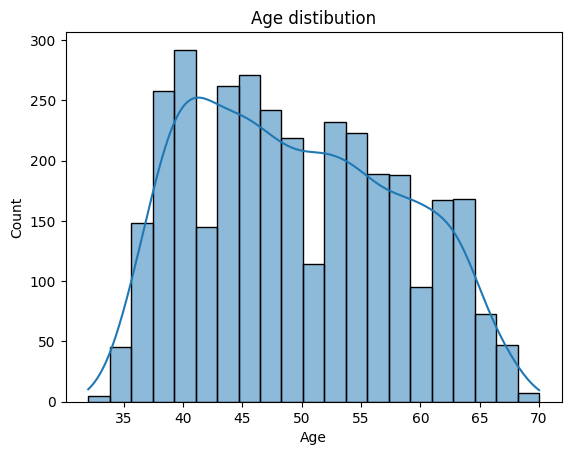

In [41]:
#plt.figure(figsize=(10,7))
sns.histplot(data=data,x="age",kde=True)
plt.title("Age distibution")
plt.xlabel("Age")


Text(0, 0.5, 'ID')

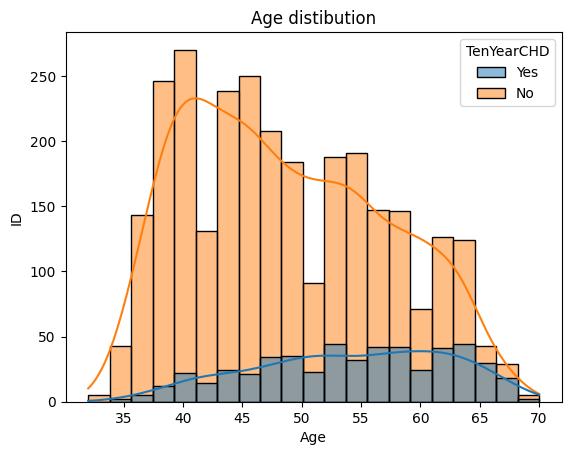

In [42]:
#plt.figure(figsize=(10,7))
sns.histplot(data=data,x="age",kde=True,hue="TenYearCHD")
plt.title("Age distibution")
plt.xlabel("Age")
plt.ylabel("ID")

 in this data Older patients face a higher risk of CHD compared to younger ones.

In [47]:
data["TenYearCHD"].value_counts()

TenYearCHD
No     2879
Yes     511
Name: count, dtype: int64

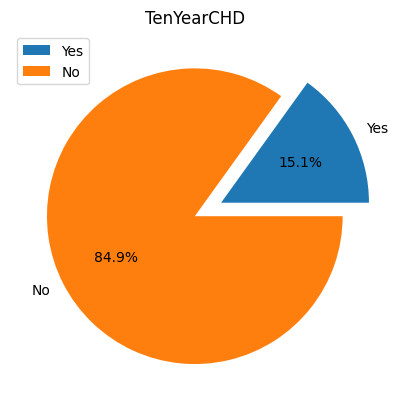

In [48]:
labels=["Yes","No"]
y=[511,2879]
ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",explode=ex)
plt.legend()
plt.title("TenYearCHD")
plt.show();

In this data we seen that following 10 years nearly 15.1% people get Cardiovascular Risk .

In [52]:
data["sex"].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

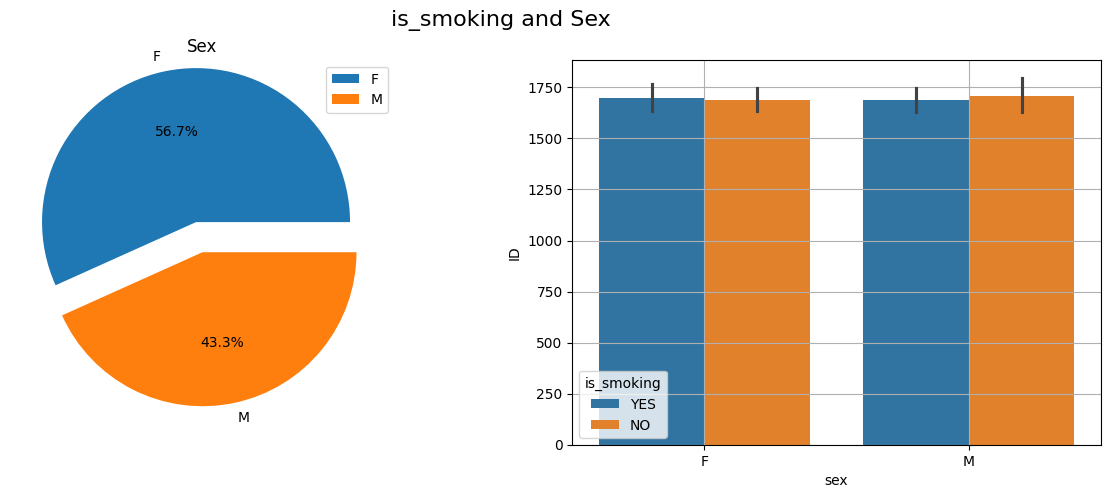

In [55]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("is_smoking and Sex" , fontsize=16)

ax1=plt.subplot(1,2,1)
labels=["F","M"]
y=[1923,1467]

ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",explode=ex)
plt.legend()
plt.title("Sex")

ax2=plt.subplot(1,2,2)
sns.barplot(data=data,x="sex",y="id",hue="is_smoking")
plt.grid()
plt.xlabel("sex")
plt.ylabel("ID");


In this dataset , the percentage of females is higher.
Additionaly, it appears that a greater proportion of females smoke compared to non smoke females, whereas a smaller proportion of meales smoke compared to non smoking males.

In [57]:
data["is_smoking"].value_counts()

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

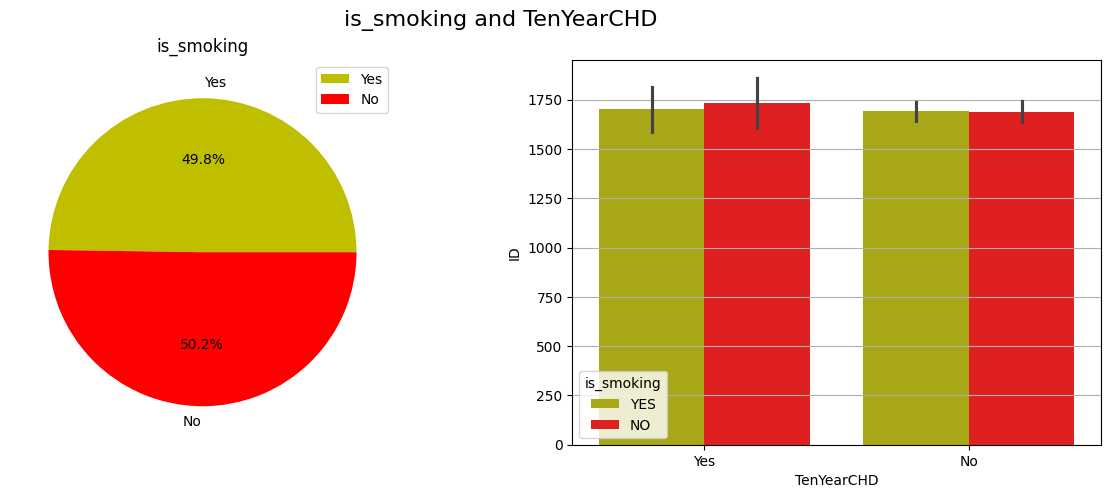

In [59]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("is_smoking and TenYearCHD" , fontsize=16)

ax1=plt.subplot(1,2,1)
labels=["Yes","No"]
y=[1687,1703]
color=["y","r"]
#ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",colors=color)
plt.legend()
plt.title("is_smoking")

ax2=plt.subplot(1,2,2)
sns.barplot(data=data,x="TenYearCHD",y="id",hue="is_smoking",palette=color)
plt.grid(axis="y")
plt.xlabel("TenYearCHD")
plt.ylabel("ID");


These data indicates that the prevalence of smoking is 49.8%.
additionaly it suggests that after ,10 years ,a non smoker face an equivalent risk of cardiovascular disease as a smoker .
it is noteworthy that the risk of cardiovascular disease is actually higher in non smokers compared to smoker.

In [62]:
data["BPMeds"].value_counts()

BPMeds
No     3246
Yes     100
Name: count, dtype: int64

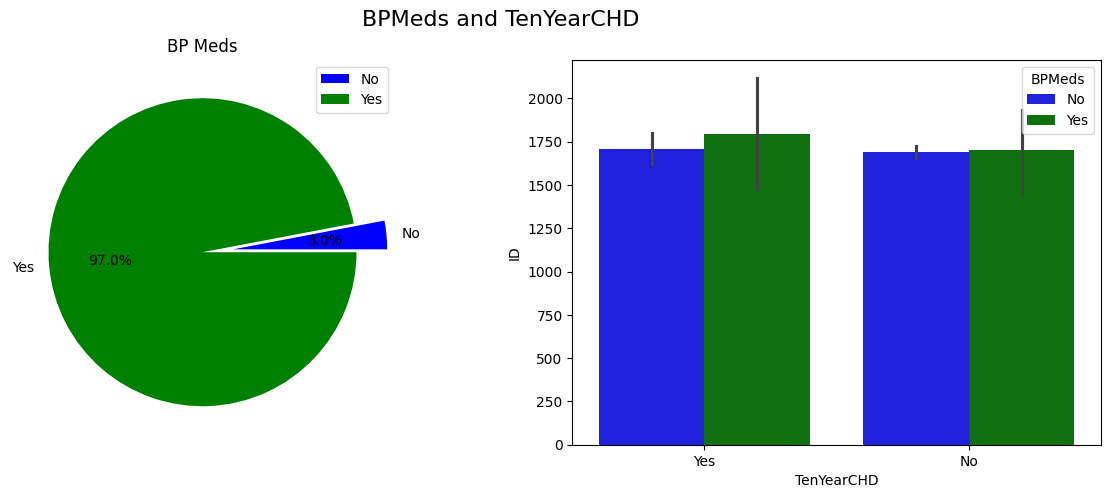

In [63]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("BPMeds and TenYearCHD" , fontsize=16)

ax1=plt.subplot(1,2,1)
labels=["No","Yes"]
y=[100,3246,]
color=["b","g"]
ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",explode=ex,colors=color)
plt.legend()
plt.title("BP Meds")

ax2=plt.subplot(1,2,2)
sns.barplot(data=data,x="TenYearCHD",y="id",hue="BPMeds",palette=color)
plt.xlabel("TenYearCHD")
plt.ylabel("ID");


In this observation, it is evident that 97% of individuals are taking medication for high blood pressure (BP). Those who do not take BP medication have a slightly lower risk of developing cardiovascular disease. Conversely, individuals who are taking BP medication (indicating they have high BP) are at a higher risk of developing cardiovascular disease.

In [67]:
data["prevalentStroke"].value_counts()

prevalentStroke
No     3368
Yes      22
Name: count, dtype: int64

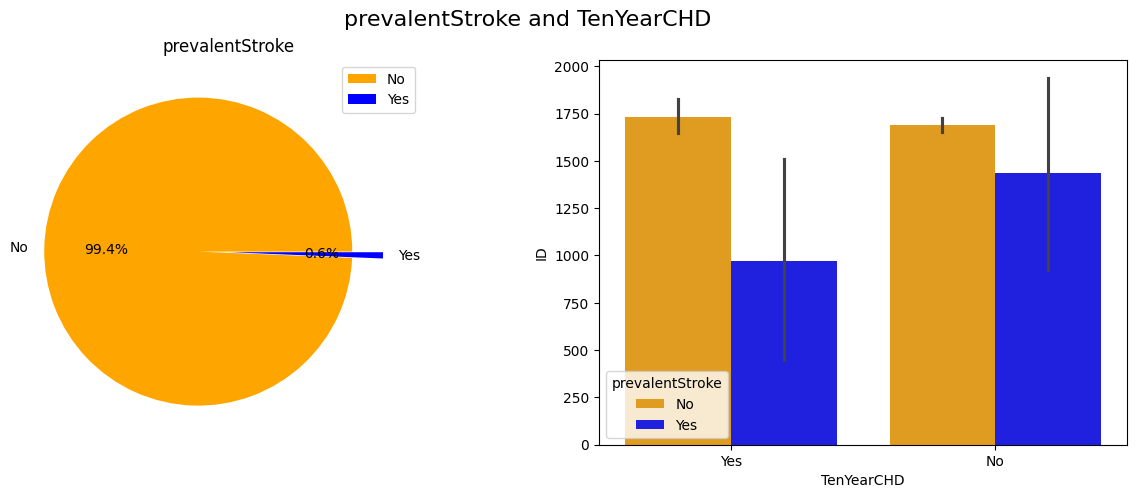

In [68]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("prevalentStroke and TenYearCHD" , fontsize=16)

ax1=plt.subplot(1,2,1)
labels=["No","Yes"]
y=[3368,22]
color=["orange","b"]
ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",explode=ex,colors=color)
plt.legend()
plt.title("prevalentStroke")

ax2=plt.subplot(1,2,2)
sns.barplot(data=data,x="TenYearCHD",y="id",hue="prevalentStroke",palette=color)
plt.xlabel("TenYearCHD")
plt.ylabel("ID");


here we seen that person have no risk they have no history of strok.
but person have more risk they they also no history of strok

In [72]:
data["prevalentHyp"].value_counts()

prevalentHyp
No     2321
Yes    1069
Name: count, dtype: int64

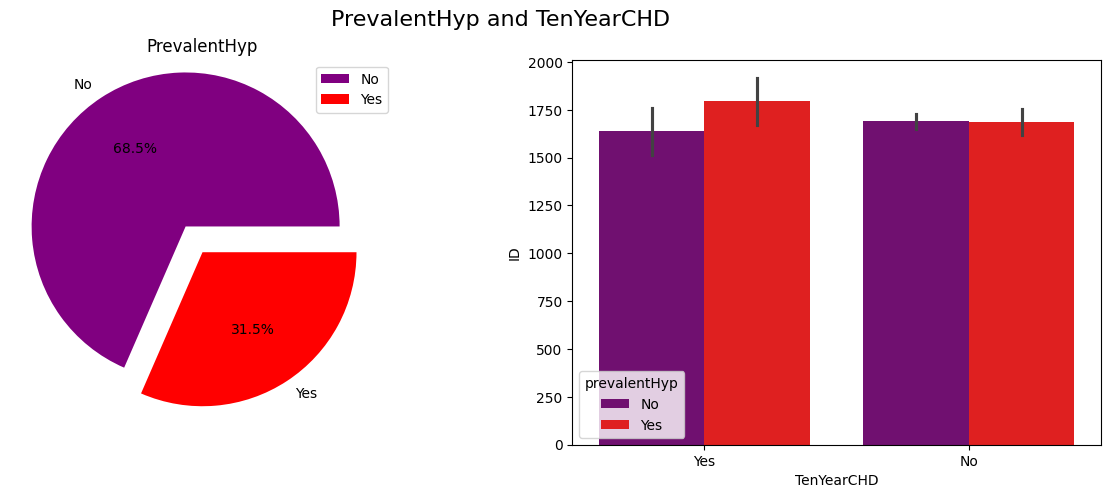

In [74]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("PrevalentHyp and TenYearCHD" , fontsize=16)

ax1=plt.subplot(1,2,1)
labels=["No","Yes"]
y=[2321,1069]
color=["purple","r"]
ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",explode=ex,colors=color)
plt.legend()
plt.title("PrevalentHyp")

ax2=plt.subplot(1,2,2)
sns.barplot(data=data,x="TenYearCHD",y="id",hue="prevalentHyp",palette=color)
plt.xlabel("TenYearCHD")
plt.ylabel("ID");


here we seen that person have no risk history of hypertension is same
but person have more risk ,they have histoy of hypertension


In [77]:
data["diabetes"].value_counts()

diabetes
No     3303
Yes      87
Name: count, dtype: int64

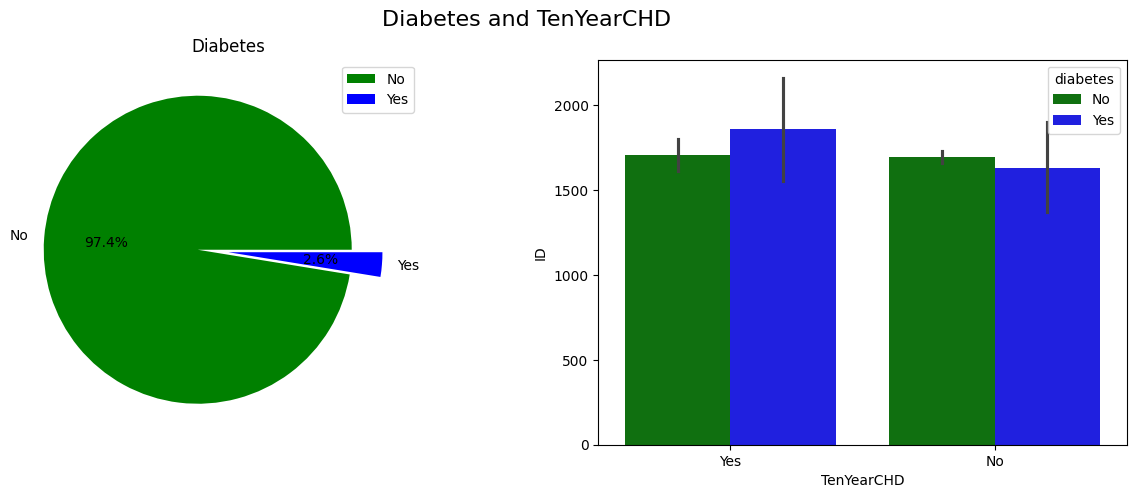

In [80]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Diabetes and TenYearCHD" , fontsize=16)

ax1=plt.subplot(1,2,1)
labels=["No","Yes"]
y=[3303,87]
color=["g","b"]
ex=(0.2,0)
plt.pie(y,labels=labels,autopct="%1.1f%%",explode=ex,colors=color)
plt.legend()
plt.title("Diabetes")

ax2=plt.subplot(1,2,2)
sns.barplot(data=data,x="TenYearCHD",y="id",hue="diabetes",palette=color)
plt.xlabel("TenYearCHD")
plt.ylabel("ID");


person have more risk ,they have diabetes

# ***for*** ***cigsPerDay***

<Axes: xlabel='cigsPerDay'>

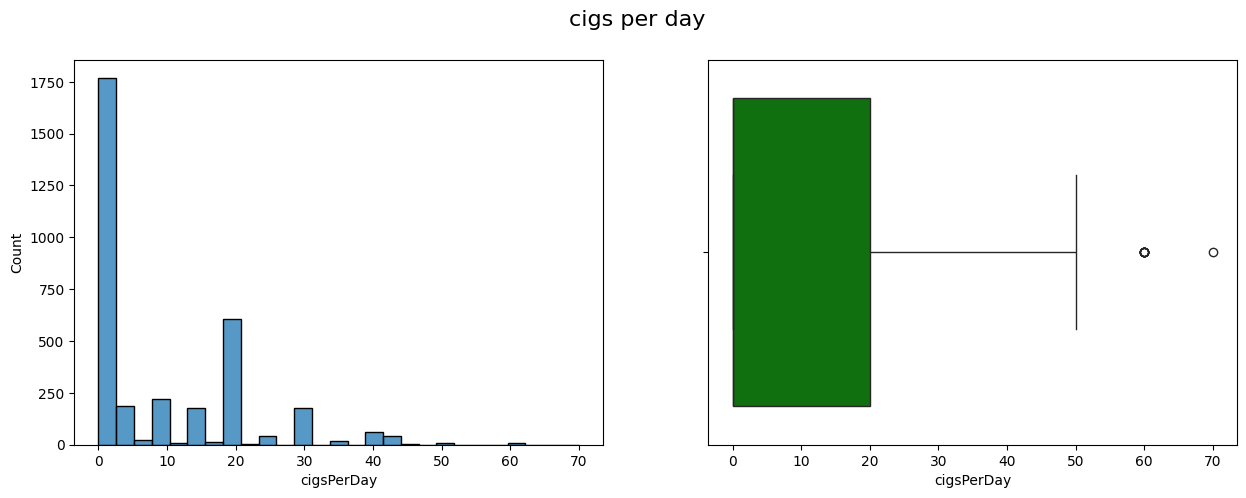

In [84]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("cigs per day",fontsize=16)
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="cigsPerDay")

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="cigsPerDay",color='green')

cigsPerDay column is positively skewed.
and 2 outliers

# ***totChol***

<Axes: xlabel='totChol'>

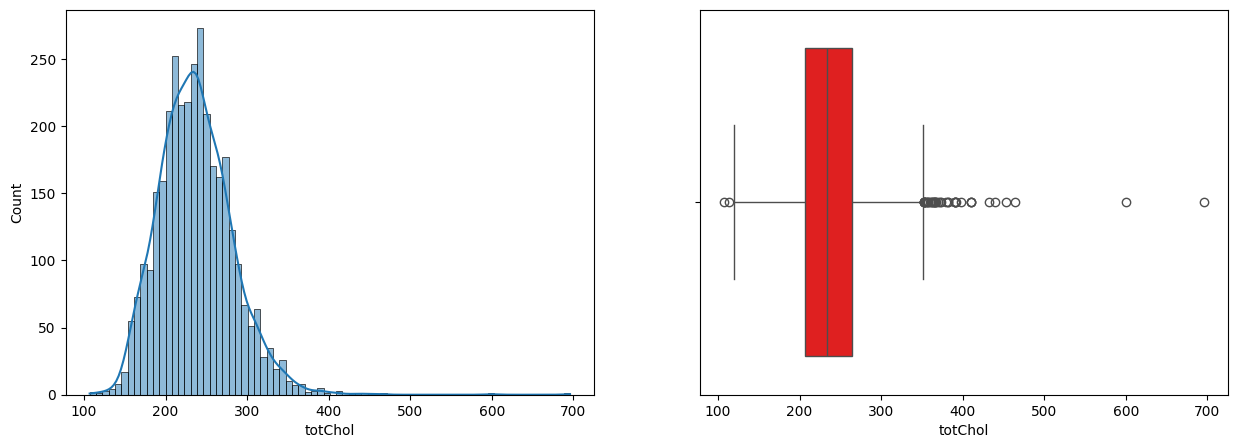

In [89]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="totChol",kde=True)

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="totChol",color='red')

totChol column is positively skewed.
and outliers are present

# ***sysBP***

<Axes: xlabel='sysBP'>

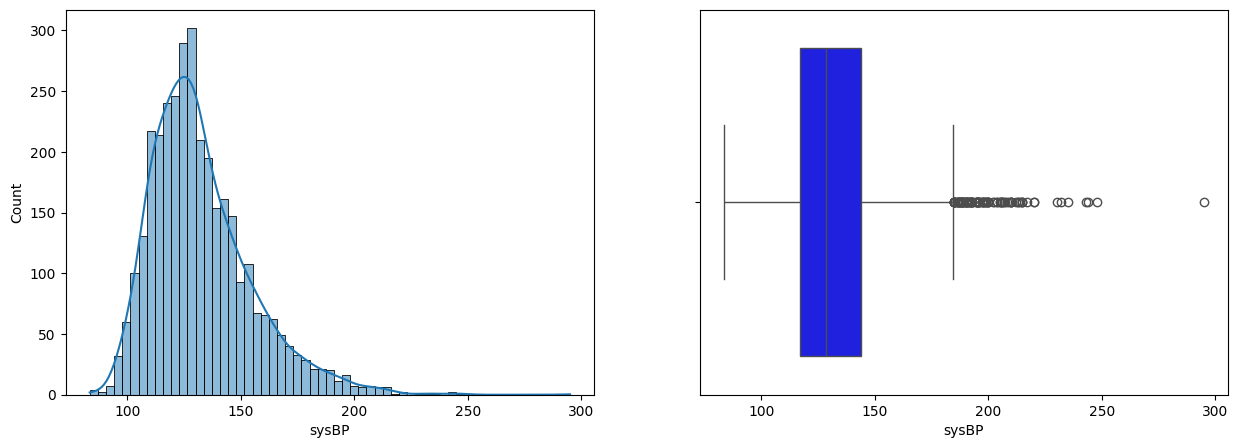

In [93]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="sysBP",kde=True)

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="sysBP",color='blue')

sysBP column is positively skewed.
and more outliers are present

# ***diaBP***

<Axes: xlabel='diaBP'>

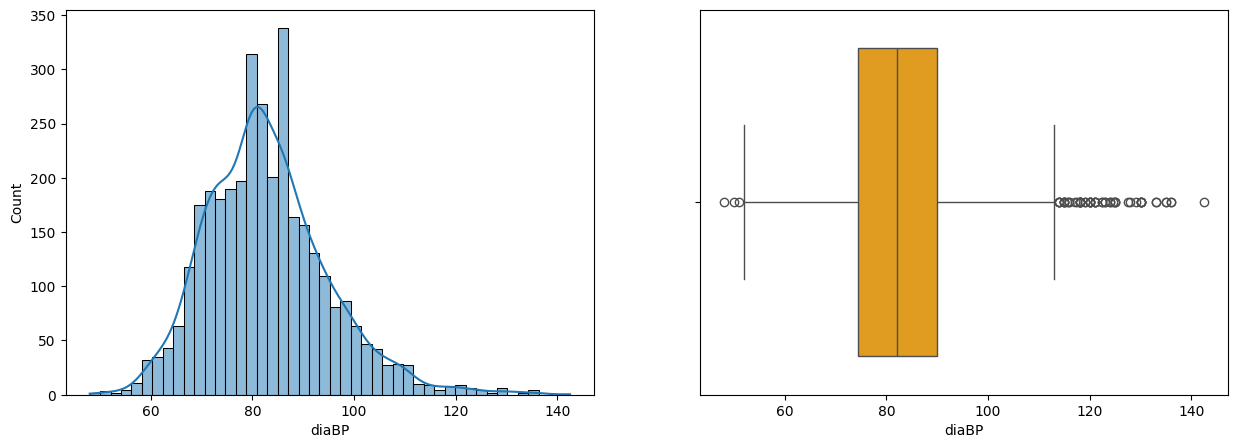

In [97]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="diaBP",kde=True)

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="diaBP",color='orange')

diaBP column is almost symmetrc.
and more outliers are present

# ***BMI***

<Axes: xlabel='BMI'>

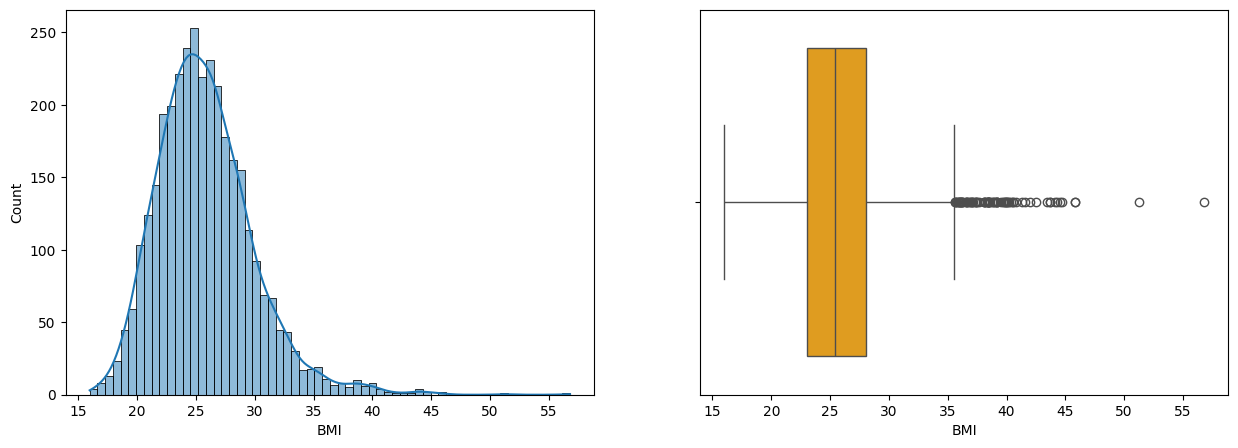

In [101]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="BMI",kde=True)

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="BMI",color='orange')

BMI column is positively skewed.
and more outliers are present

# ***heartRate***

<Axes: xlabel='heartRate'>

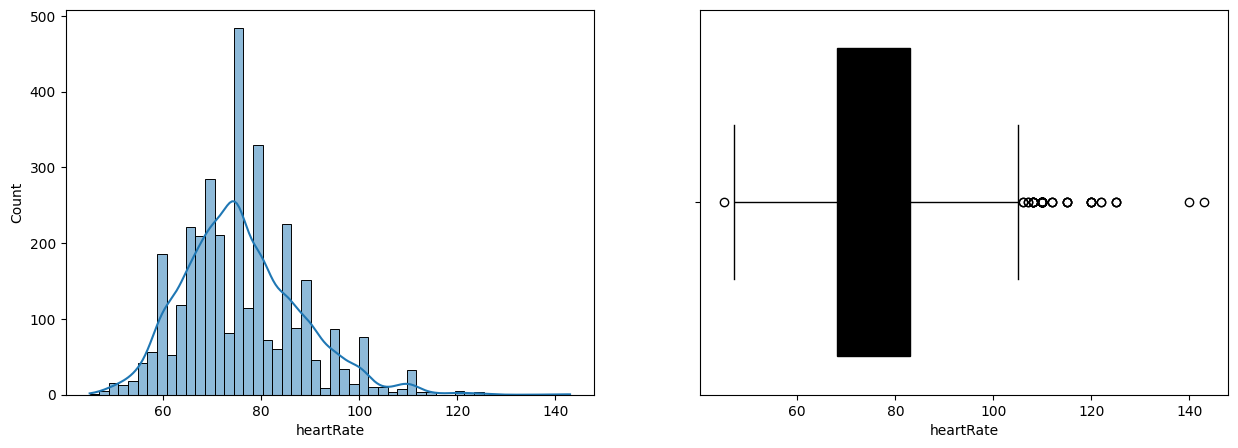

In [105]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="heartRate",kde=True)

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="heartRate",color='black')

heartRate column is almost symmetrc.
and more outliers are present

# ***glucose***

<Axes: xlabel='glucose'>

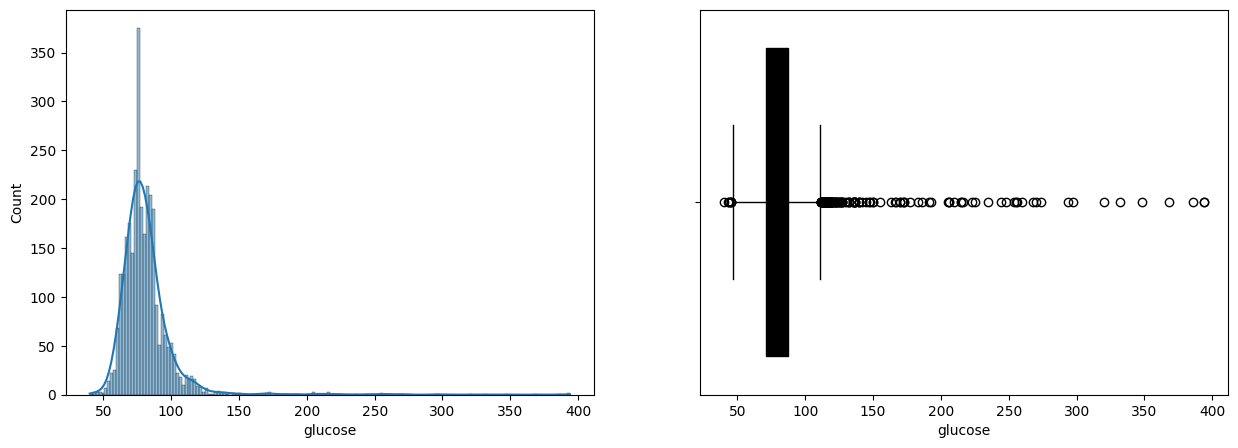

In [109]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.histplot(data=data,x="glucose",kde=True)

ax2=plt.subplot(1,2,2)
sns.boxplot(data=data,x="glucose",color='black')

glucose column is positively skewed.
and more outliers are present

Text(0, 0.5, 'sysBP')

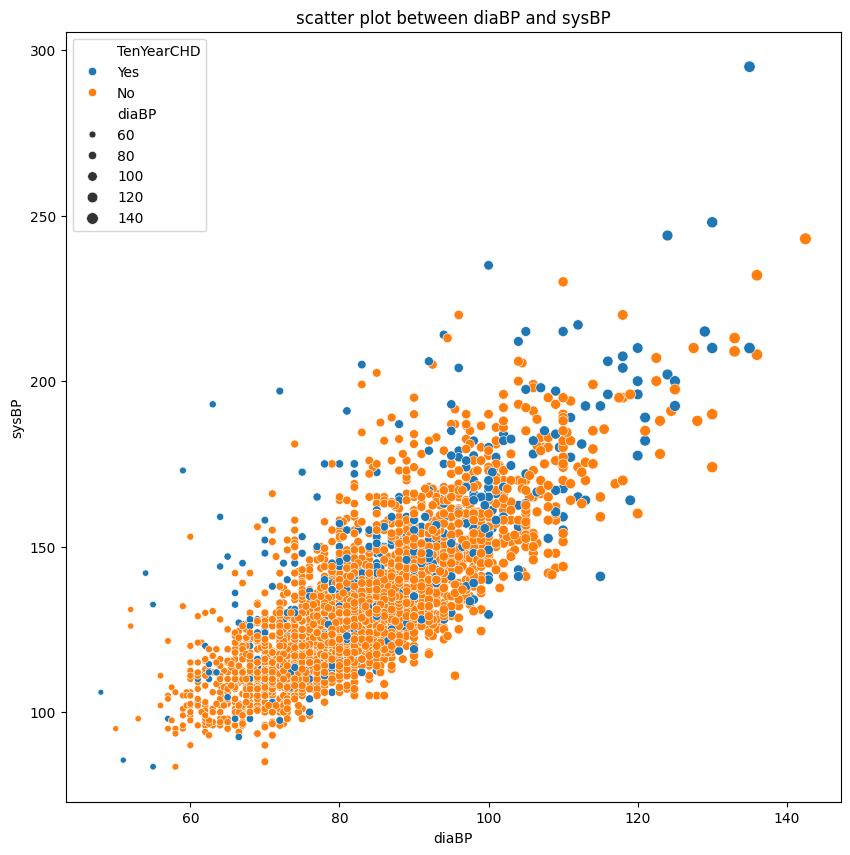

In [111]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data ,x="diaBP",y="sysBP",hue="TenYearCHD",size="diaBP")
plt.title("scatter plot between diaBP and sysBP")
plt.xlabel("diaBP")
plt.ylabel("sysBP")

this plot shows that relation between diaBP and sysBP

# ***feature*** ***engineering***

In [115]:
df= pd.read_csv(r"C:\Users\GHANWAT\OneDrive\Desktop\data_cardiovascular_risk.csv")
df


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [117]:
df.drop(["education", "id"], axis=1, inplace=True)


In [120]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# ***Handling*** ***Missing*** ***Values***

In [123]:
a=df.isnull().sum()
a

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [125]:
b=df.isnull().sum().sort_values(ascending = False)/len(df.isnull())*100
b

glucose            8.967552
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
age                0.000000
sex                0.000000
is_smoking         0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

In [127]:
c=list(b)
c

[8.96755162241888,
 1.2979351032448379,
 1.12094395280236,
 0.6489675516224189,
 0.41297935103244837,
 0.029498525073746312,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [129]:
d=[]
for i in range(7):
    e=c.pop(0)
    d.append(e)
    print(d)


[8.96755162241888]
[8.96755162241888, 1.2979351032448379]
[8.96755162241888, 1.2979351032448379, 1.12094395280236]
[8.96755162241888, 1.2979351032448379, 1.12094395280236, 0.6489675516224189]
[8.96755162241888, 1.2979351032448379, 1.12094395280236, 0.6489675516224189, 0.41297935103244837]
[8.96755162241888, 1.2979351032448379, 1.12094395280236, 0.6489675516224189, 0.41297935103244837, 0.029498525073746312]
[8.96755162241888, 1.2979351032448379, 1.12094395280236, 0.6489675516224189, 0.41297935103244837, 0.029498525073746312, 0.0]


In [131]:
f=["glucose","education","BPMeds","totChol","cigsPerDay","BMI","heartRate"]

Text(0, 0.5, '% of null value')

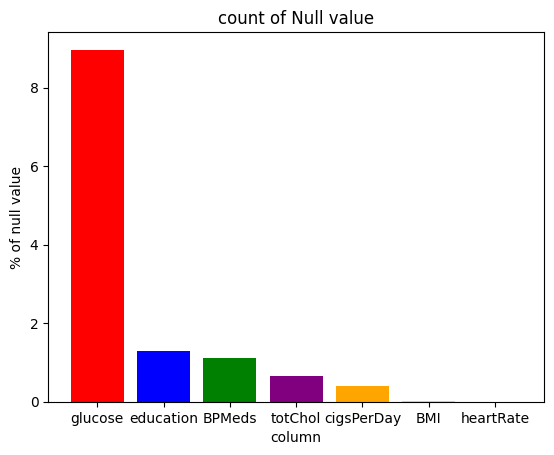

In [133]:
color=["red","blue","green","purple","orange","pink","black"]
plt.bar(f,d,color=color)
plt.title("count of Null value")
plt.xlabel("column")
plt.ylabel("% of null value")

Glucose column have more null value  aprox 9 .

Hear total Missing data was less than 14 % insted of delecting data.
we replacing missing values with statistical value (mean ,median mode)

# ***replacing missing values***

In Numeric column more missing value are present so I replace the null value from Median .

### ***Glucose***


In [140]:
df["glucose"].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [142]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

## ***cigsPerDay***

In [145]:
df["cigsPerDay"].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [147]:
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].median())

## ***totChol***

In [150]:
df["totChol"].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [152]:
df["totChol"]=df["totChol"].fillna(df["totChol"].median())

## ***BMI***

In [155]:
df["BMI"].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [157]:
df["BMI"]=df["BMI"].fillna(df["BMI"].median())

## ***heartRate***

In [160]:
df["heartRate"].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [162]:
df["heartRate"]=df["heartRate"].fillna(df["heartRate"].median())

### Replace the categorical value by Mode

### ***BPMeds***


In [166]:
df["BPMeds"].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [168]:
df["BPMeds"]=df["BPMeds"].fillna(df["BPMeds"].mode()[0])

## ***education***

In [171]:
#df["education"].describe()

In [173]:
#data["education"]=data["education"].fillna(data["education"].mode()[0])

In [175]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

here replace all null value

In [178]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [182]:
df[df.duplicated()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


in our data no duplicated value

In [185]:
df["sex"].replace({"F":0,"M":1},inplace = True)

In [187]:
df["is_smoking"].value_counts().to_dict()


{'NO': 1703, 'YES': 1687}

In [189]:
df["is_smoking"].replace({'NO':1, 'YES': 0},inplace= True)

replace categorical value in numerical value
(labeling)

In [192]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# ***Pair plot***

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


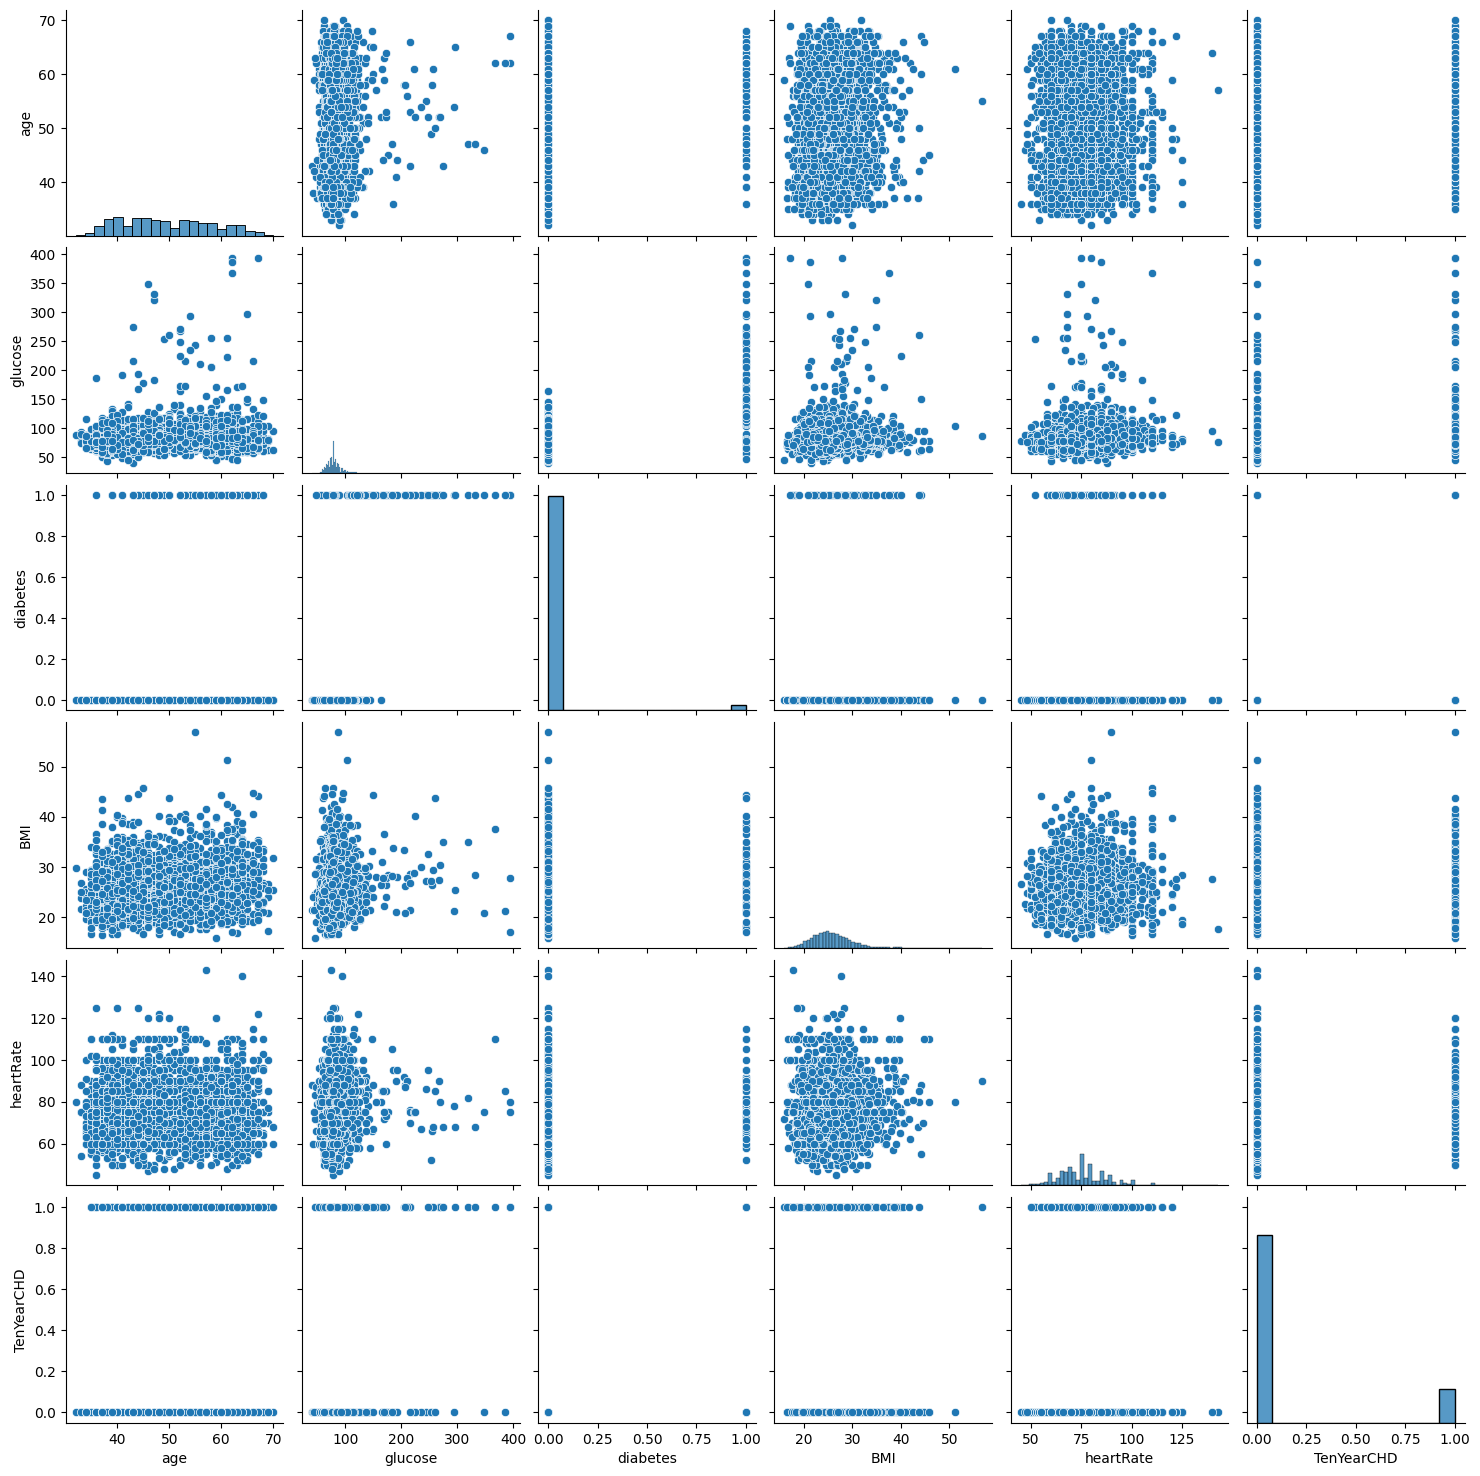

In [198]:
subset = df[["age", "glucose", "diabetes", "BMI", "heartRate", "TenYearCHD"]]

sns.pairplot(subset)
plt.show()

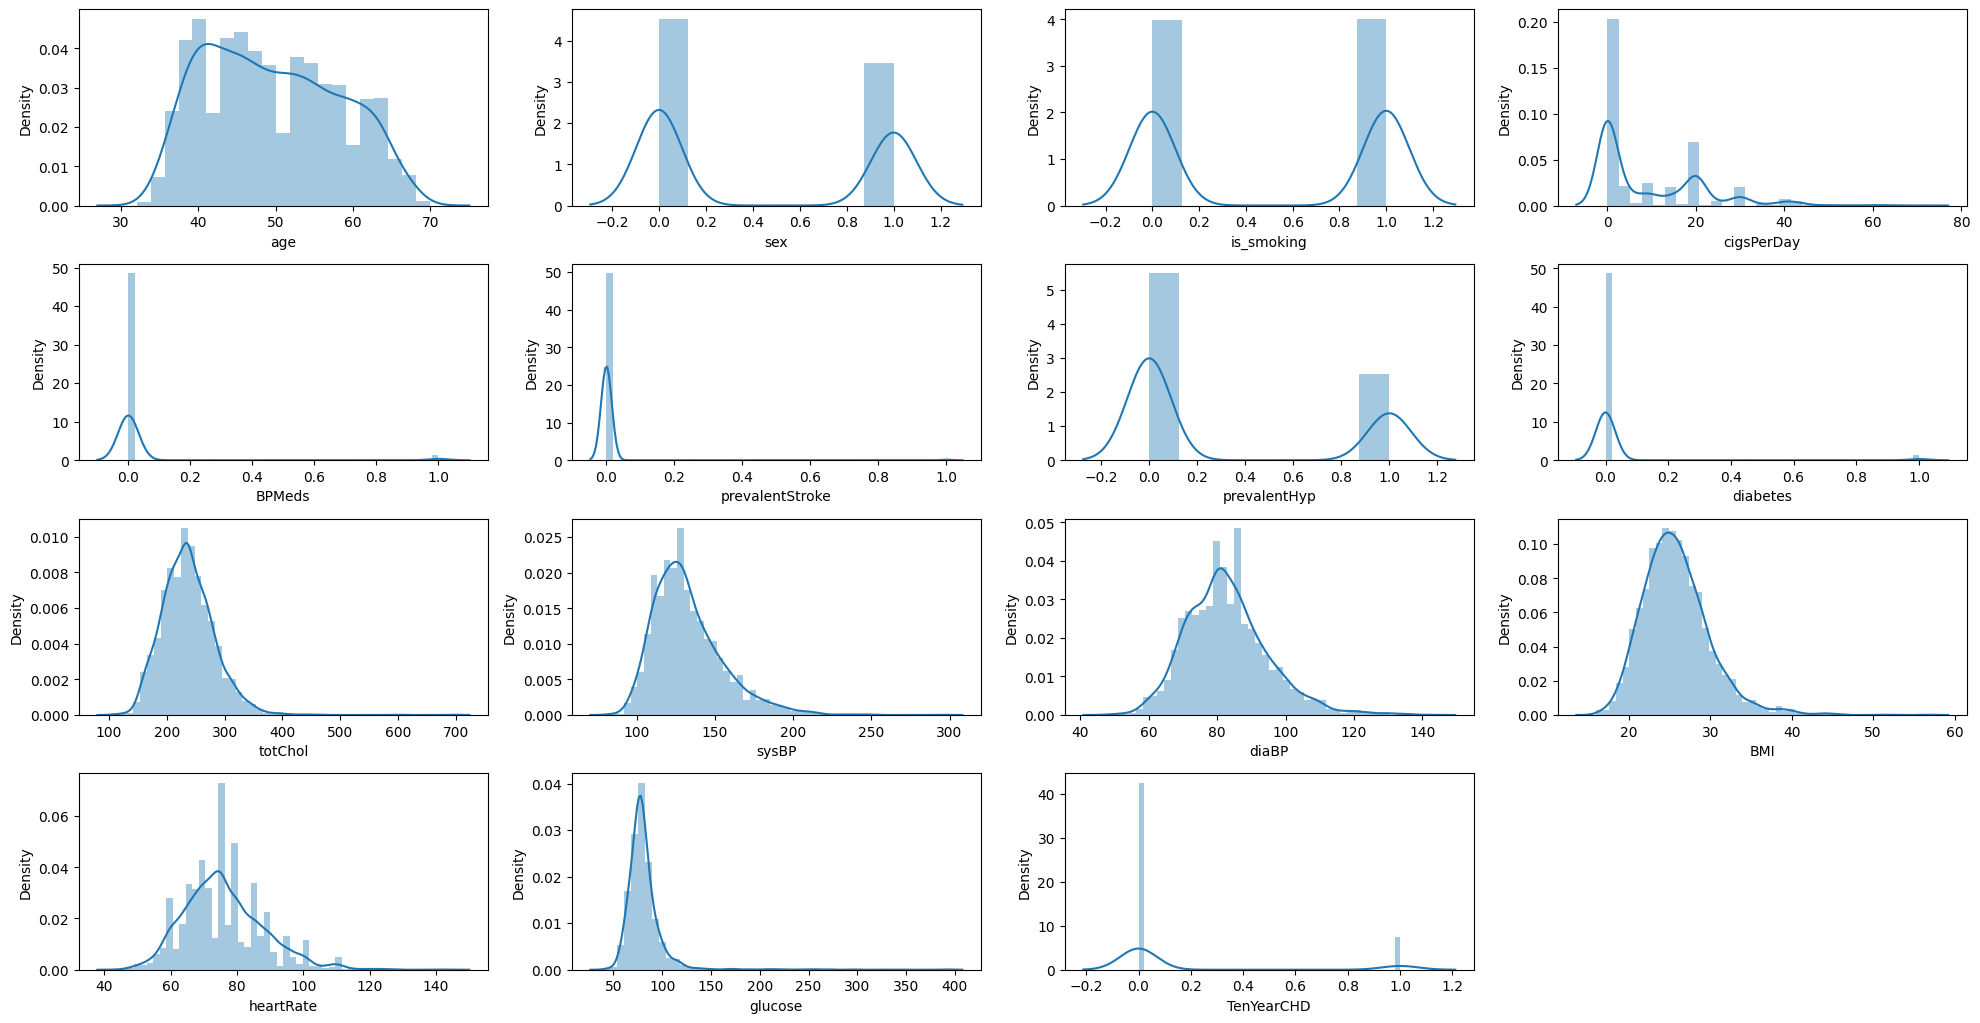

In [199]:
#Density graph
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

# ***Heatmap***

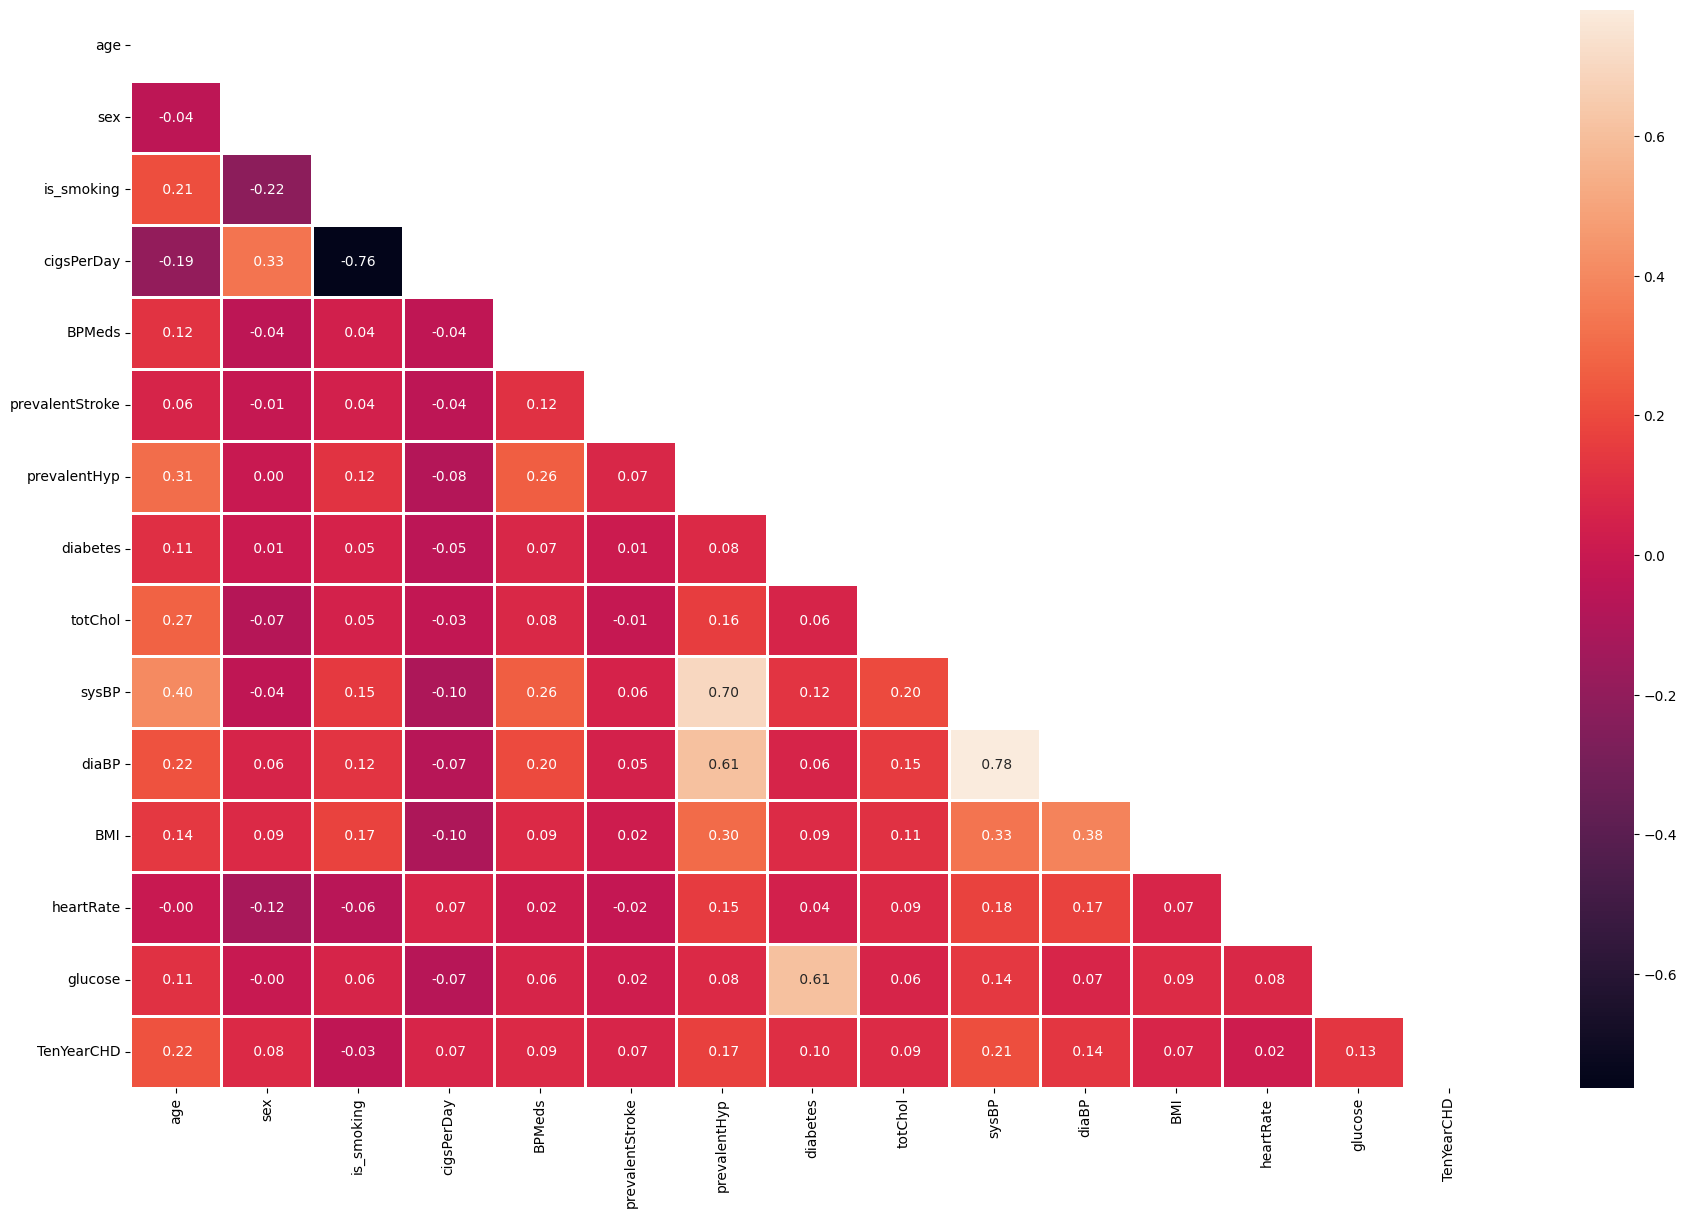

In [203]:
plt.figure(figsize=(22,14))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,linewidths=1,fmt=" .2f")
plt.show()

In [205]:
corr_matrix=df.corr().abs()
mask=np.triu(np.ones_like(corr_matrix,dtype= bool))
tri_df= corr_matrix.mask(mask)
to_drop=[x for x in tri_df.columns if any(tri_df[x]>0.60)]
df=df.drop(to_drop,axis=1)
print(df.shape[1])

11


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   totChol          3390 non-null   float64
 6   diaBP            3390 non-null   float64
 7   BMI              3390 non-null   float64
 8   heartRate        3390 non-null   float64
 9   glucose          3390 non-null   float64
 10  TenYearCHD       3390 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 291.5 KB


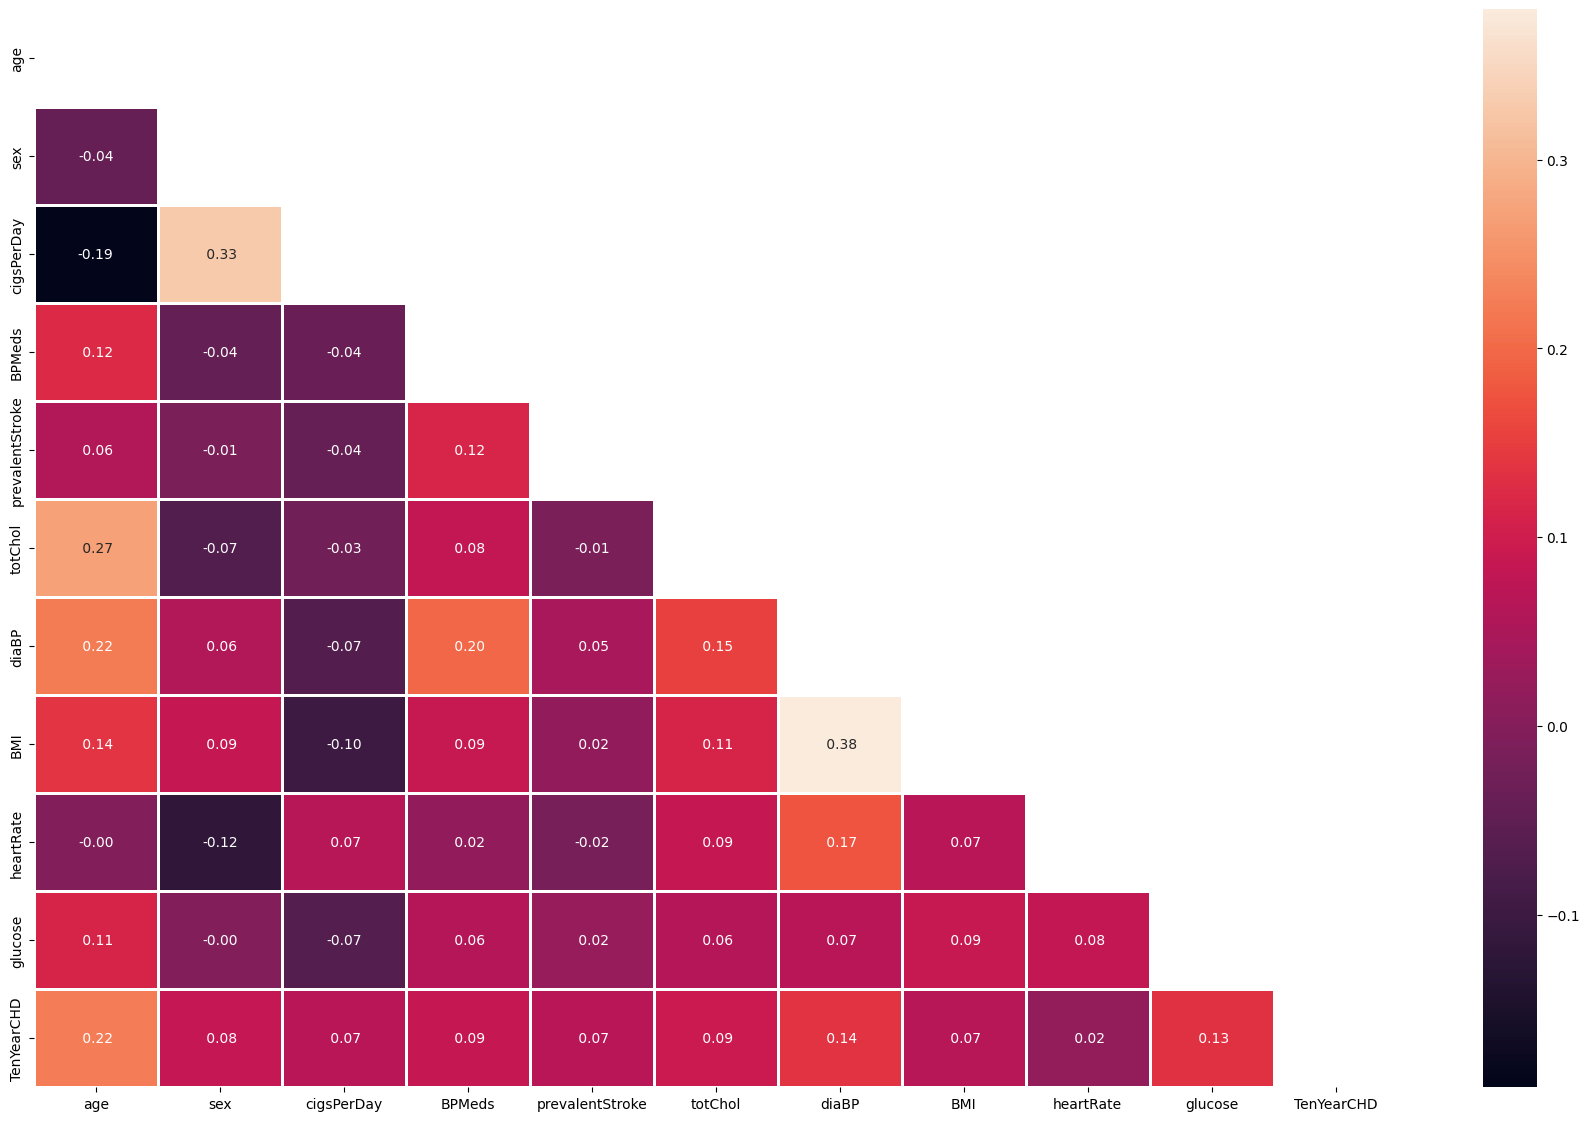

In [209]:
plt.figure(figsize=(22,14))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,linewidths=1,fmt=" .2f")
plt.show()

# ***outliers*** ***removing***

### ***cigsPerDay***

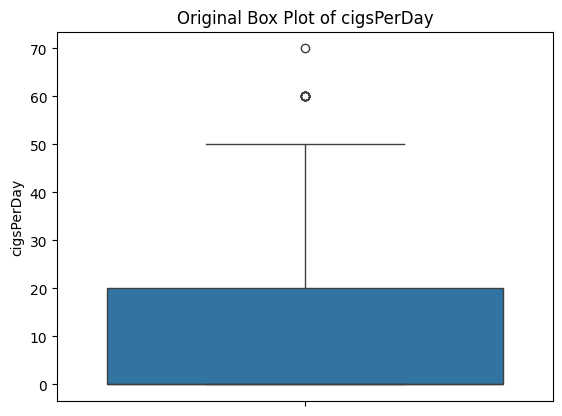

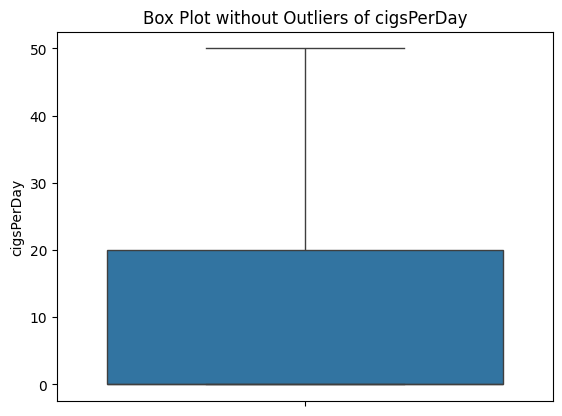

In [213]:
def removal_box_plot(df, column, threshold_max):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[(df[column] <= threshold_max)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

threshold_max = 50
no_outliers = removal_box_plot(data, 'cigsPerDay', threshold_max)

### ***totChol***

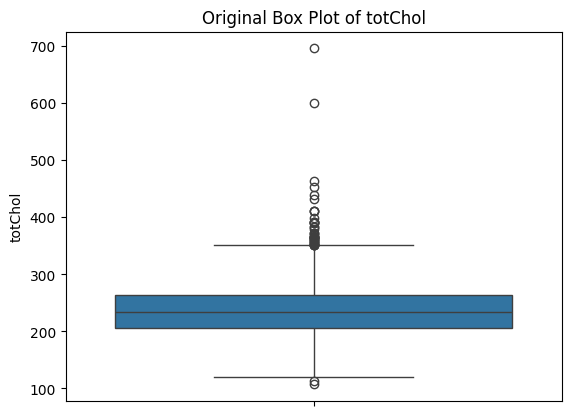

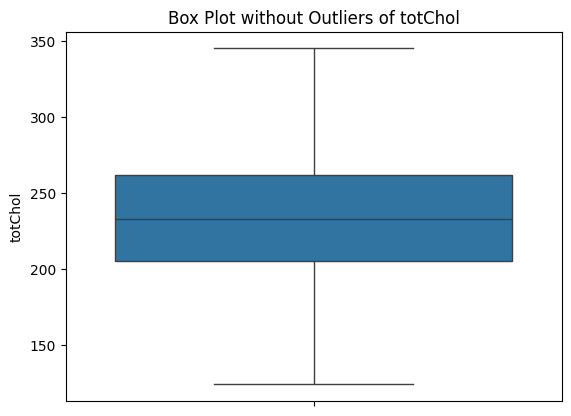

In [216]:
def removal_box_plot(df, column, threshold_min, threshold_max):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[(df[column] >= threshold_min) & (df[column] <= threshold_max)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Assuming 'data' is your DataFrame containing the 'glucose' column
threshold_min = 120
threshold_max = 345
no_outliers = removal_box_plot(data, 'totChol', threshold_min, threshold_max)

### diaBP


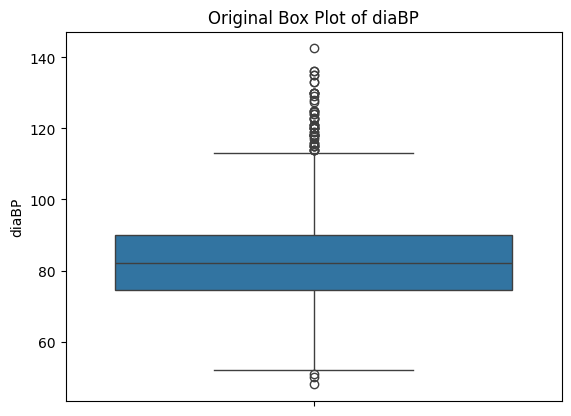

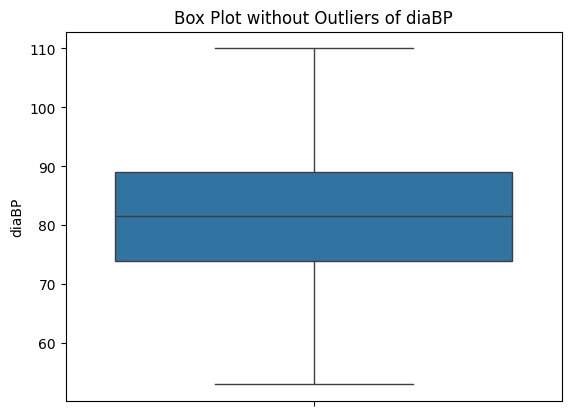

In [219]:
def removal_box_plot(df, column, threshold_min, threshold_max):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[(df[column] >= threshold_min) & (df[column] <= threshold_max)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Assuming 'data' is your DataFrame containing the 'glucose' column
threshold_min = 53
threshold_max = 110
no_outliers = removal_box_plot(data, 'diaBP', threshold_min, threshold_max)

## heartRate

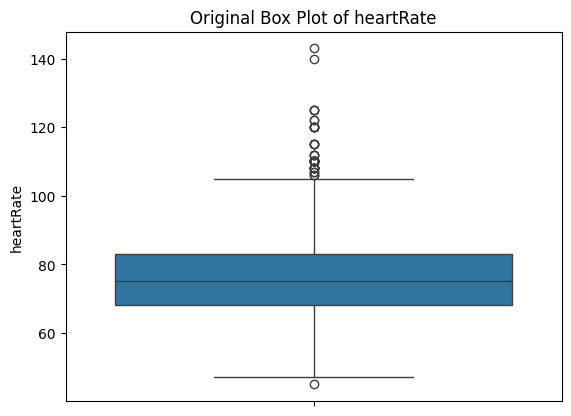

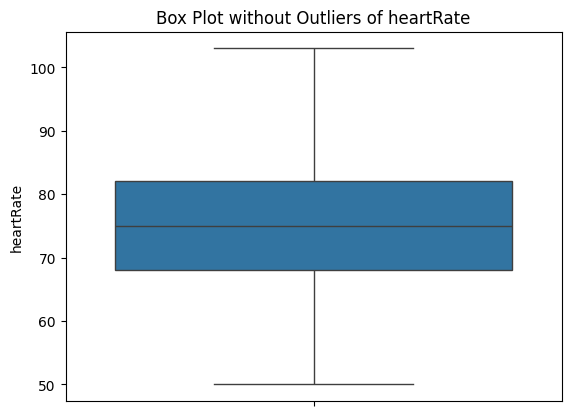

In [222]:
def removal_box_plot(df, column, threshold_min, threshold_max):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[(df[column] >= threshold_min) & (df[column] <= threshold_max)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Assuming 'data' is your DataFrame containing the 'glucose' column
threshold_min = 50
threshold_max = 103
no_outliers = removal_box_plot(data, 'heartRate', threshold_min, threshold_max)

### glucose

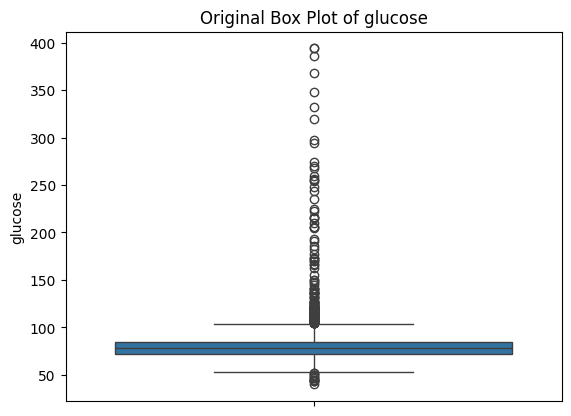

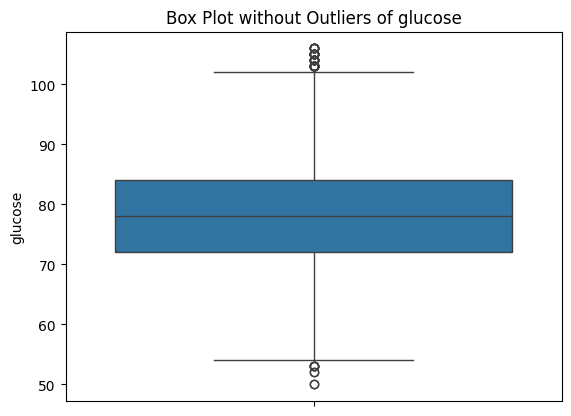

In [228]:
def removal_box_plot(df, column, threshold_min, threshold_max):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[(df[column] >= threshold_min) & (df[column] <= threshold_max)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Assuming 'data' is your DataFrame containing the 'glucose' column
threshold_min = 49
threshold_max = 106
no_outliers = removal_box_plot(df, 'glucose', threshold_min, threshold_max)

# Train Test Split

In [231]:
from sklearn.model_selection import train_test_split

In [233]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

split independent and dependent variable .

In [236]:
x=df.drop("TenYearCHD",axis=1)
x

,age,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,diaBP,BMI,heartRate,glucose
0,64,0,3.0,0.0,0,221.0,85.0,25.38,90.0,80.0
1,36,1,0.0,0.0,0,212.0,98.0,29.77,72.0,75.0
2,46,0,10.0,0.0,0,250.0,71.0,20.35,88.0,94.0
3,50,1,20.0,0.0,0,233.0,88.0,28.26,68.0,94.0
4,64,0,30.0,0.0,0,241.0,85.0,26.42,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0.0,0.0,0,261.0,79.0,29.28,70.0,103.0
3386,46,0,0.0,0.0,0,199.0,56.0,21.96,80.0,84.0
3387,44,1,3.0,0.0,0,352.0,119.0,28.92,73.0,72.0
3388,60,1,0.0,0.0,0,191.0,105.0,23.01,80.0,85.0


In [238]:
y=df["TenYearCHD"]
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=1, stratify= y)

In [242]:
x_train

,age,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,diaBP,BMI,heartRate,glucose
3129,40,0,3.0,0.0,0,234.0,84.0,31.57,72.0,112.0
2717,40,0,20.0,0.0,0,231.0,87.0,23.29,89.0,99.0
1146,47,1,50.0,0.0,0,217.0,89.0,28.88,82.0,75.0
3064,38,1,5.0,0.0,0,243.0,85.5,19.53,85.0,79.0
1835,63,1,15.0,0.0,0,207.0,100.0,21.33,72.0,77.0
...,...,...,...,...,...,...,...,...,...,...
2994,45,0,0.0,0.0,0,235.0,58.0,26.79,75.0,79.0
3305,58,1,20.0,0.0,0,255.0,89.0,27.47,75.0,73.0
2731,40,0,0.0,0.0,0,251.0,87.0,31.60,75.0,80.0
2143,48,1,20.0,0.0,0,253.0,73.0,26.25,69.0,70.0


In [244]:
x_test

,age,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,diaBP,BMI,heartRate,glucose
1721,54,1,15.0,0.0,0,300.0,80.0,27.30,68.0,78.0
1464,48,1,15.0,0.0,0,214.0,80.0,26.27,95.0,99.0
1307,56,0,0.0,0.0,0,287.0,94.0,26.01,75.0,99.0
2846,63,1,20.0,0.0,0,228.0,82.0,25.84,82.0,81.0
594,49,1,0.0,0.0,0,248.0,82.0,27.29,52.0,254.0
...,...,...,...,...,...,...,...,...,...,...
986,43,0,0.0,0.0,0,240.0,93.0,38.43,72.0,77.0
3339,49,1,0.0,0.0,0,221.0,107.5,25.97,63.0,78.0
2795,44,1,20.0,0.0,0,211.0,88.0,23.39,60.0,79.0
1697,54,1,6.0,0.0,0,260.0,86.0,24.05,85.0,85.0


In [246]:
y_train.value_counts()/len(y_train)

TenYearCHD
0    0.849136
1    0.150864
Name: count, dtype: float64

In [248]:
y_test.value_counts()/len(y_test)

TenYearCHD
0    0.849558
1    0.150442
Name: count, dtype: float64

In [250]:
df.isnull().sum()

age                0
sex                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
totChol            0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# scaling data

In [253]:
from sklearn.preprocessing import StandardScaler

In [255]:
scaler=StandardScaler()

In [257]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# logistic regression

In [260]:
from sklearn.linear_model import LogisticRegression

In [262]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [264]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# evalution train

In [267]:
y_pred_log=log_reg.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_log)
print("Confusion_matrix :\n",cnf_matrix)
acc_score_log_train= accuracy_score(y_train,y_pred_log)
print("accuracy_score ",acc_score_log_train)
clf_report= classification_report(y_train,y_pred_log)
print("classification_report : \n",clf_report)

Confusion_matrix :
 [[2005   10]
 [ 340   18]]
accuracy_score  0.8525073746312685
classification_report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      2015
           1       0.64      0.05      0.09       358

    accuracy                           0.85      2373
   macro avg       0.75      0.52      0.51      2373
weighted avg       0.82      0.85      0.80      2373



# evalution test

In [270]:
y_pred_log=log_reg.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_log)
print("Confusion_matrix :\n",cnf_matrix)
acc_score_log_test= accuracy_score(y_test,y_pred_log)
print("accuracy_score ",acc_score_log_test)
clf_report= classification_report(y_test,y_pred_log)
print("classification_report : \n",clf_report)

Confusion_matrix :
 [[863   1]
 [145   8]]
accuracy_score  0.856440511307768
classification_report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       864
           1       0.89      0.05      0.10       153

    accuracy                           0.86      1017
   macro avg       0.87      0.53      0.51      1017
weighted avg       0.86      0.86      0.80      1017



# Handling Imbalance Data

In [277]:
#!pip install imblearn
import sys
print(sys.executable)


C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\python.exe


In [279]:
!C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\python.exe -m pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [281]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)
# x_sm,y_sm = smote.fit(x,y)

In [283]:
y_sm=pd.DataFrame(y_sm)

In [285]:
y_sm.value_counts()

TenYearCHD
0             2879
1             2879
Name: count, dtype: int64

after balance data

In [288]:
x_train,x_test,y_train,y_test = train_test_split( x_sm,y_sm , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(4606, 10)
(1152, 10)


In [290]:
y_train.value_counts()

TenYearCHD
0             2326
1             2280
Name: count, dtype: int64

In [292]:
y_test.value_counts()

TenYearCHD
1             599
0             553
Name: count, dtype: int64

# evalution train

In [295]:
y_pred_log=log_reg.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_log)
print("Confusion_matrix :\n",cnf_matrix)
acc_score_log_train= accuracy_score(y_train,y_pred_log)
print("accuracy_score ",acc_score_log_train)
clf_report= classification_report(y_train,y_pred_log)
print("classification_report : \n",clf_report)

Confusion_matrix :
 [[   0 2326]
 [   0 2280]]
accuracy_score  0.4950065132435953
classification_report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2326
           1       0.50      1.00      0.66      2280

    accuracy                           0.50      4606
   macro avg       0.25      0.50      0.33      4606
weighted avg       0.25      0.50      0.33      4606



# evalution test

In [300]:
y_pred_log=log_reg.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_log)
print("Confusion_matrix :\n",cnf_matrix)
acc_score_log_test= accuracy_score(y_test,y_pred_log)
print("accuracy_score ",acc_score_log_test)
clf_report= classification_report(y_test,y_pred_log)
print("classification_report : \n",clf_report)

Confusion_matrix :
 [[  0 553]
 [  0 599]]
accuracy_score  0.5199652777777778
classification_report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.52      1.00      0.68       599

    accuracy                           0.52      1152
   macro avg       0.26      0.50      0.34      1152
weighted avg       0.27      0.52      0.36      1152



# KNN

In [303]:
from sklearn.neighbors import KNeighborsClassifier

In [305]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [307]:
y_pred_knn=knn_model.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_knn)
print("confusion_matrix : \n",cnf)
acc_score_knn_train=accuracy_score(y_train,y_pred_knn)
print("accuracy_score :",acc_score_knn_train)
clf_report=classification_report(y_train,y_pred_knn)
print("classification_report : \n", clf_report)

confusion_matrix : 
 [[1718  608]
 [  31 2249]]
accuracy_score : 0.8612679114198871
classification_report : 
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      2326
           1       0.79      0.99      0.88      2280

    accuracy                           0.86      4606
   macro avg       0.88      0.86      0.86      4606
weighted avg       0.89      0.86      0.86      4606



# evalution test

In [310]:
y_pred_knn=knn_model.predict(x_test)
cnf=confusion_matrix(y_test,y_pred_knn)
print("confusion_matrix : \n",cnf)
acc_score_knn_test=accuracy_score(y_test,y_pred_knn)
print("accuracy_score :",acc_score_knn_test)
clf_report=classification_report(y_test,y_pred_knn)
print("classification_report: \n", clf_report)

confusion_matrix : 
 [[344 209]
 [ 22 577]]
accuracy_score : 0.7994791666666666
classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.62      0.75       553
           1       0.73      0.96      0.83       599

    accuracy                           0.80      1152
   macro avg       0.84      0.79      0.79      1152
weighted avg       0.83      0.80      0.79      1152



# Decision Tree

In [312]:
from sklearn.tree import DecisionTreeClassifier

In [314]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [316]:
dt_model= DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

# evalution train

In [319]:
y_pred=dt_model.predict(x_train)
cnf=confusion_matrix(y_train,y_pred)
print("confusion_matrix :\n",cnf)
acc=accuracy_score(y_train,y_pred)
print("accuracy_score : ",acc)
clf=classification_report(y_train,y_pred)
print("classification_report : \n",clf)

confusion_matrix :
 [[2326    0]
 [   0 2280]]
accuracy_score :  1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



# evalution test

In [322]:
y_pred=dt_model.predict(x_test)
cnf=confusion_matrix(y_test,y_pred)
print("confusion_matrix :\n",cnf)
acc=accuracy_score(y_test,y_pred)
print("accuracy_score : ",acc)
clf=classification_report(y_test,y_pred)
print("classification_report :\n ",clf)

confusion_matrix :
 [[415 138]
 [102 497]]
accuracy_score :  0.7916666666666666
classification_report :
                precision    recall  f1-score   support

           0       0.80      0.75      0.78       553
           1       0.78      0.83      0.81       599

    accuracy                           0.79      1152
   macro avg       0.79      0.79      0.79      1152
weighted avg       0.79      0.79      0.79      1152



model get overfitt so we want to do hyperparametric tunning

#  Hyperparameter Tunning

In [326]:
dt_model = DecisionTreeClassifier()

hyp= {'criterion' : ['gini','entropy'],
'max_depth': np.arange(1,15),
'min_samples_leaf':np.arange(2,10),
'min_samples_split':np.arange(2,20)}

gscv_dt_model = GridSearchCV(dt_model, hyp, cv=7)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [328]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(14), min_samples_leaf=np.int64(3),
                       min_samples_split=np.int64(6))

# Training Data after hyper parameter tunning

In [331]:
dt_model= gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_train_hyp_dt = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score_train_hyp_dt)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[2088  238]
 [ 187 2093]]

Accuracy Score :
 0.907729049066435

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2326
           1       0.90      0.92      0.91      2280

    accuracy                           0.91      4606
   macro avg       0.91      0.91      0.91      4606
weighted avg       0.91      0.91      0.91      4606



# Testing Data after hyper parameter tunning

In [334]:
dt_model= gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)

y_pred_test = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_test_hyp_dt = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_score_test_hyp_dt)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[413 140]
 [112 487]]

Accuracy Score :
 0.78125

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       553
           1       0.78      0.81      0.79       599

    accuracy                           0.78      1152
   macro avg       0.78      0.78      0.78      1152
weighted avg       0.78      0.78      0.78      1152



# Random forest

In [337]:
from sklearn.ensemble import RandomForestClassifier

In [339]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [341]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

# evalution train

In [343]:
y_pred_rf = rf_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_rf)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_dt_train = accuracy_score(y_train,y_pred_rf)
print('\nAccuracy Score :\n', acc_score_dt_train)

clf_report = classification_report(y_train,y_pred_rf)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[2326    0]
 [   0 2280]]

Accuracy Score :
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



# Evalution for test

In [347]:
y_pred_rf = rf_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score_test_hyp_dt = accuracy_score(y_test,y_pred_rf)
print('\nAccuracy Score :\n', acc_score_test_hyp_dt)

clf_report = classification_report(y_test,y_pred_rf)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[472  81]
 [ 54 545]]

Accuracy Score :
 0.8828125

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       553
           1       0.87      0.91      0.89       599

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152



In [349]:
rf_model = RandomForestClassifier()

hyp = {'criterion': ['gini','entropy'],
       'n_estimators': np.arange(10,200,10),
       'max_depth': np.arange(2,10),
       'min_samples_split': np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [351]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=np.int64(9), min_samples_leaf=np.int64(4),
                       min_samples_split=np.int64(4),
                       n_estimators=np.int64(110))

In [353]:
rf_model = RandomForestClassifier(max_depth=8,
                                  min_samples_leaf=2,
                                  min_samples_split=8,
                                  n_estimators=80,
                                  max_features='sqrt',
                                  oob_score = True) # log2(no. of features)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=80, oob_score=True)

# after hyperparamatric tunning for train

In [356]:

y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ')
print(cnf_matrix)

acc_score_train_hyp_rf = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc_score_train_hyp_rf)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion MAtrix: 
[[1839  487]
 [ 325 1955]]

Accuracy score is 0.8237082066869301

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      2326
           1       0.80      0.86      0.83      2280

    accuracy                           0.82      4606
   macro avg       0.83      0.82      0.82      4606
weighted avg       0.83      0.82      0.82      4606



# after hyperparamatric tunning for test

In [359]:
# Test data Accuracy
y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion MAtrix:\n ',cnf_matrix)

acc_score_test_hyp_rf = accuracy_score(y_test,y_pred)
print('\nAccuracy score is\n', acc_score_test_hyp_rf)

clf_report = classification_report(y_test,y_pred)
print('\nClassification Report:\n', clf_report)


Confusion MAtrix:
  [[385 168]
 [116 483]]

Accuracy score is
 0.7534722222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       553
           1       0.74      0.81      0.77       599

    accuracy                           0.75      1152
   macro avg       0.76      0.75      0.75      1152
weighted avg       0.75      0.75      0.75      1152



In [361]:
rf_model.oob_score_

0.7481545809813287

# SVM

In [369]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


In [371]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(round(svc_classifier.score(x_test, y_test),2))

In [373]:
svm=SVC(probability=True)
svm.fit(x_train,y_train)

SVC(probability=True)

# evalution for train

In [376]:
y_pred_train = svm.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n", cnf_matrix)
acc_score_train_svm= accuracy_score(y_train,y_pred_train)
print('Accuracy is:', acc_score_train_svm)


Clf = classification_report(y_train,y_pred_train)
print('Classification Report : \n', Clf)

Confusion Matrix
 [[1375  951]
 [ 612 1668]]
Accuracy is: 0.6606600086843248
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.59      0.64      2326
           1       0.64      0.73      0.68      2280

    accuracy                           0.66      4606
   macro avg       0.66      0.66      0.66      4606
weighted avg       0.66      0.66      0.66      4606



# evalution for test

In [379]:
y_pred_test = svm.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix: \n', cnf_matrix)

acc_score_test_svm= accuracy_score(y_test,y_pred_test)
print('Accuracy is:', acc_score_test_svm)


Clf = classification_report(y_test,y_pred_test)
print('Classification Report: \n', Clf)

Confusion Matrix: 
 [[313 240]
 [159 440]]
Accuracy is: 0.6536458333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.57      0.61       553
           1       0.65      0.73      0.69       599

    accuracy                           0.65      1152
   macro avg       0.66      0.65      0.65      1152
weighted avg       0.65      0.65      0.65      1152



In [381]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',  'Decision Tree Classifier', 'Random Forest Classifier',"SVM"],
    'Score': [acc_score_log_test,acc_score_knn_test,acc_score_test_hyp_dt,acc_score_test_hyp_rf,acc_score_test_svm]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,0.882812
1,KNN,0.799479
3,Random Forest Classifier,0.753472
4,SVM,0.653646
0,Logistic Regression,0.519965


Best model for Cardiovasculer risk is "Decision Tree Classifier	" with an accuracy of 88.2812%.

In [383]:
pip install streamlit pandas scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 599.9 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/9.9 MB 684.4 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/9.9 MB 684.4 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/9.9 MB 699.0 kB/s eta 0:00:13
   ----- ---------------------------------- 1.3/9.9 MB 789.6 kB/s eta 0:00:11
   ------ --------------------------------- 1.6/9.9 MB 864.6 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.9 MB 838.9 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.9 MB 838.9 kB/s eta 0:00:10
   --------- -----------------

In [387]:
import joblib

# Assume you trained this model already
joblib.dump(models, 'cardio_model.pkl')


['cardio_model.pkl']

In [391]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Train your best model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Save the best model
joblib.dump(model, 'cardio_model.pkl')


['cardio_model.pkl']